In [1]:
import sys 
import stacklineplot
import torch
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [18, 10]

### Multi Channel Conv VAE

In [46]:
samples = np.load("../reconstruction/results_recon/mc_conv_eval_recon_800.npy")

In [47]:
samples.shape

(32, 3, 784)

#### Original

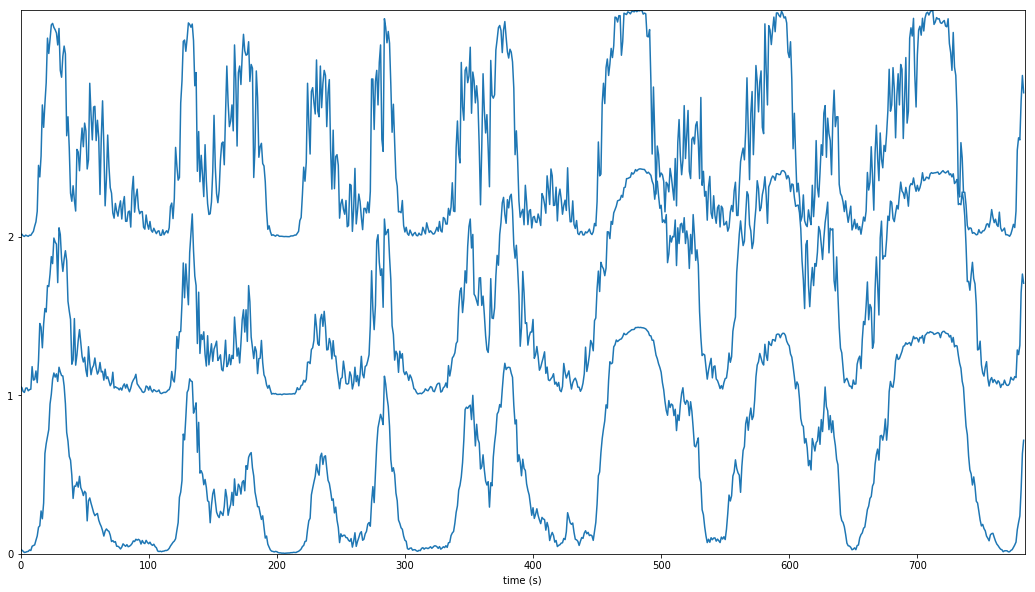

In [48]:
stacklineplot.stackplot(samples[3])

#### Recon

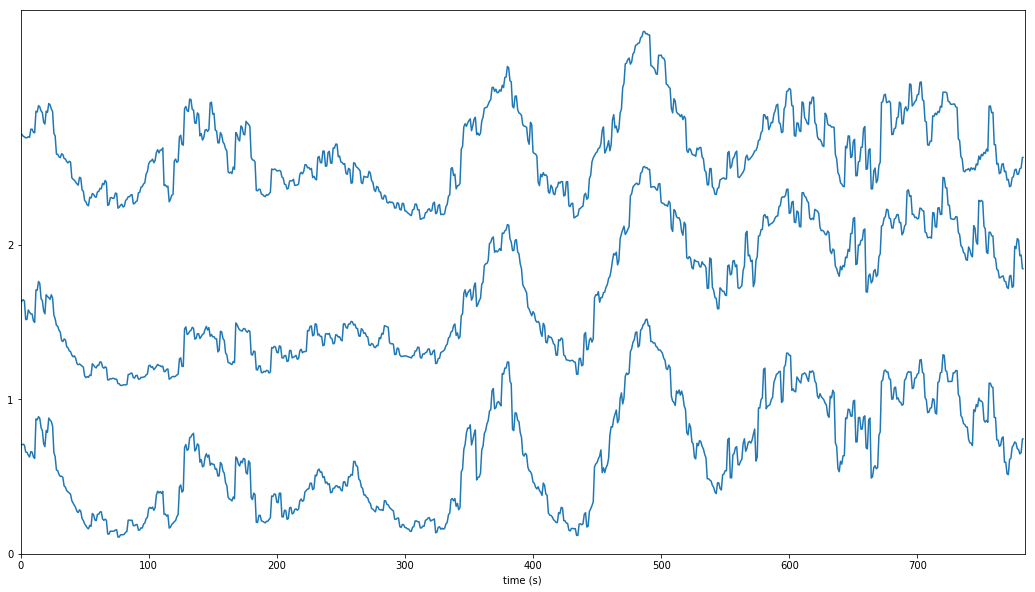

In [49]:
stacklineplot.stackplot(samples[16+3])

### Neural Fill

In [128]:
sys.path.append("../")
from utils import reduce_channel_batch, interpolate_signals
example_idx = 1
epoch = 1000

In [129]:
# samples = np.load("../denoise/results_denoise/mc_conv_fill_eval_recon_" + str(epoch) +".npy")
samples = np.load("../denoise/results_denoise/1c_conv_fill_eval_" + str(epoch) +".npy")

#### Original

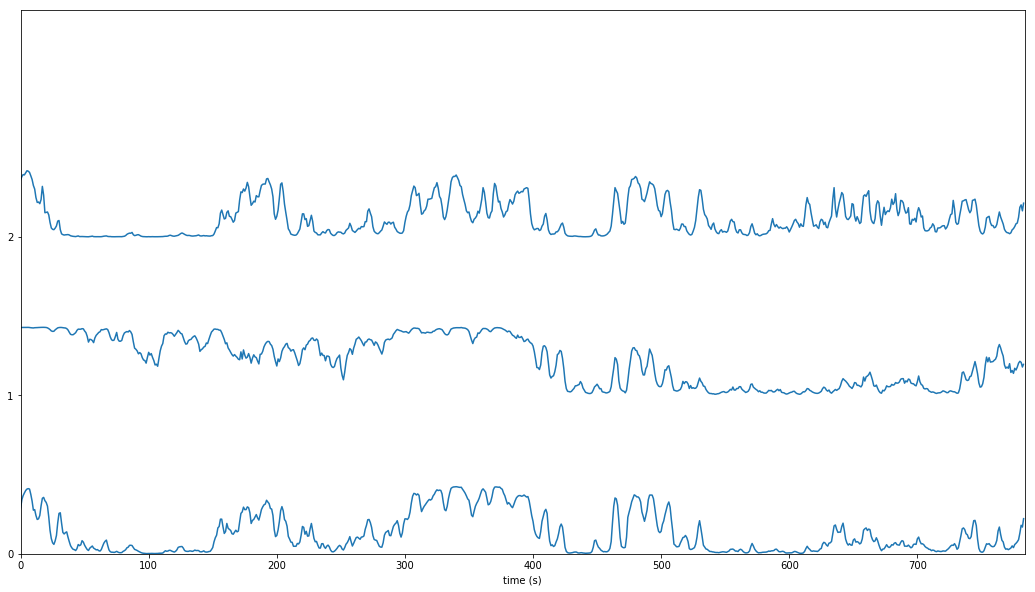

In [130]:
stacklineplot.stackplot(samples[example_idx], yscale=.3)

#### Channel Reduced

In [131]:
reduced = reduce_channel_batch(torch.from_numpy(samples), 1)
# stacklineplot.stackplot(reduced[example_idx])

#### Reconstruction

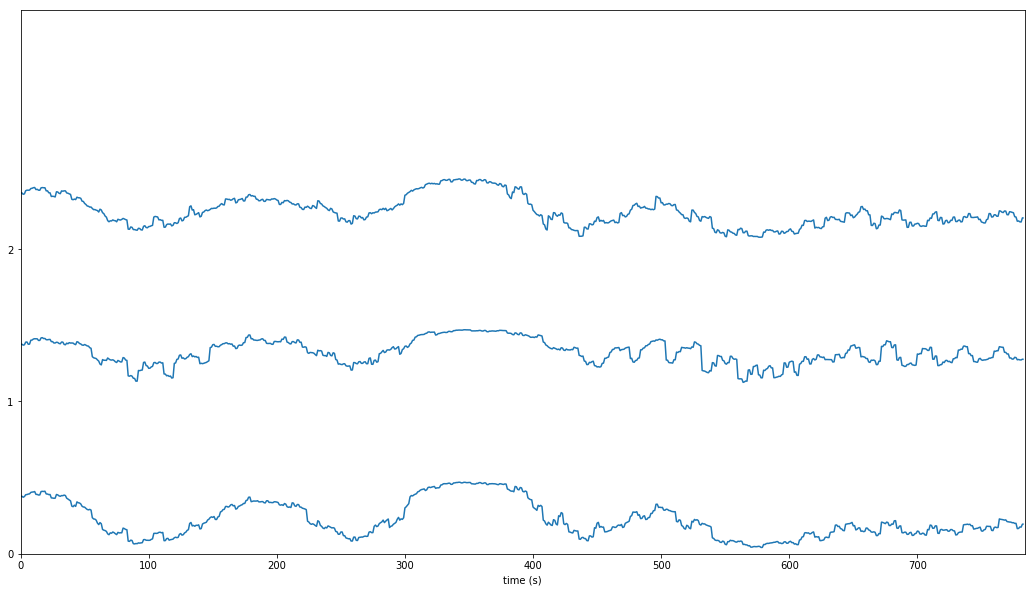

In [132]:
stacklineplot.stackplot(samples[16+example_idx], yscale=.3)

### Estimated with Interpolation

In [126]:
estimated = interpolate_signals(reduced[example_idx][0], reduced[example_idx][2])
estimated_with_adjacent = np.stack([reduced[example_idx][0], estimated, reduced[example_idx][2]])

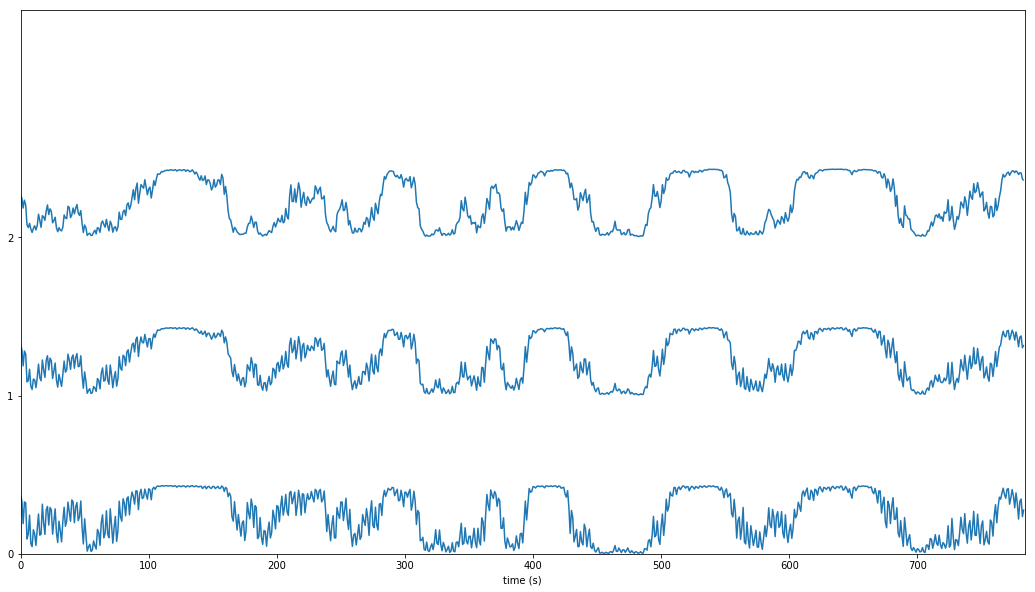

In [127]:
stacklineplot.stackplot(estimated_with_adjacent, yscale=.3)